# Building a basic graph in LangGraph

First define the schema of the state.

In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    a_message: str
    b_message: str
    messages: list[str]

Define the nodes - this will be the functionality or agents that will modify the state in the order of the workflow/graph.

In [27]:
def node_a(state: State):
    messages = state["messages"]
    a_message = "Message from node a"
    return {"messages": messages + [a_message], "a_message": a_message}

In [28]:
def node_b(state: State):
    messages = state["messages"]
    a_message = state["a_message"]
    
    # some logic
    
    b_message = "Message from node b"
    return {"messages": messages + [b_message], "b_message": b_message, "a_message": a_message + ", now its by b as well"}

Compile the graph.

In [29]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State)

graph_builder.add_node(node_a)
graph_builder.add_node(node_b)

graph_builder.add_edge(START, "node_a")
graph_builder.add_edge("node_a", "node_b")

graph = graph_builder.compile()

Visualize the graph/workflow.

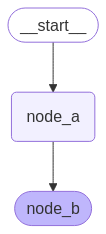

In [30]:
# from IPython.display import Image, display

# display(Image(graph.get_graph().draw_mermaid_png()))

graph

Run the graph and get the final updated state.

In [31]:
result = graph.invoke({"messages": ["start message"]})

In [32]:
result

{'a_message': 'Message from node a, now its by b as well',
 'b_message': 'Message from node b',
 'messages': ['start message', 'Message from node a', 'Message from node b']}